### Seaborn

Seaborn è una libreria per la creazione di grafici statistici in Python. Si basa su matplotlib e si integra perfettamente con le strutture dati pandas.

Seaborn ti aiuta a esplorare e comprendere i tuoi dati. Le sue funzioni di tracciatura operano su dataframe e array contenenti interi set di dati ed eseguono internamente la mappatura semantica e l'aggregazione statistica necessarie per produrre grafici informativi. La sua API dichiarativa e orientata ai set di dati ti consente di concentrarti sul significato dei diversi elementi dei tuoi grafici, piuttosto che sui dettagli di come disegnarli.

Ecco un esempio di ciò che possiamo fare con seaborn:

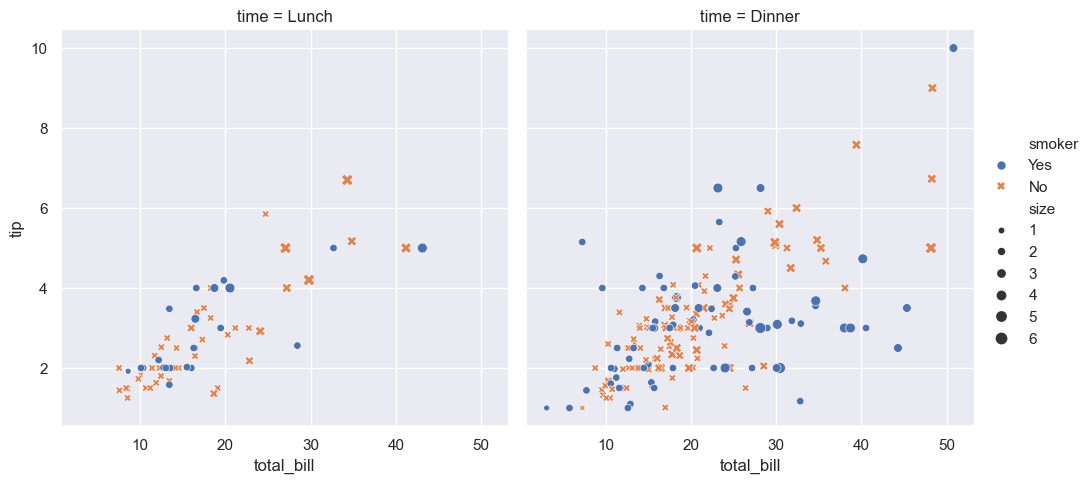

In [3]:
# Import seaborn and pyplot
import seaborn as sns
from matplotlib import pyplot as plt

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
    )

plt.show()

Facciamo ora alcune considerazioni sull'esempio appena presentato:

1. Seaborn contiene al suo interno dei dataset già pronti che possono essere caricati come dei DataFrame di Pandas. In questo esempio abbiamo caricato il DataSet _tips_ contenente informazioni sulle mance date ai camerieri;

2. Con una sola funzione in Seaborn abbiamo creato due diversi grafici, suddiviso i dati in categorie (_fumatore_ e _non fumatore_) semplicemente impostando un parametro;

3. Seaborn è perfettamente integrata con Pandas (abbiamo passato l'intero DataFrame alla funzione) e con MatPlotLib (_plt.show()_ ha mostrato il grafico creato con Seaborn senza battere ciglio). Notare inoltre come non abbiamo dovuto suddividere i dati in liste o altre strutture dati simili, è stato sufficiente dire a Seaborn quali colonne dovevano essere utilizzate per popolare gli assi del grafico (_total_bill_ e _tips_).

Vediamo ora come utilizzare Seaborn per le diverse necessità che possiamo incontrare durante un workflow di analisi dati.

### Stima statistica

Spesso ci interessa il valore medio di una variabile in funzione di altre variabili. Molte funzionalità di Seaborn eseguono automaticamente la stima statistica necessaria per rispondere a queste domande:

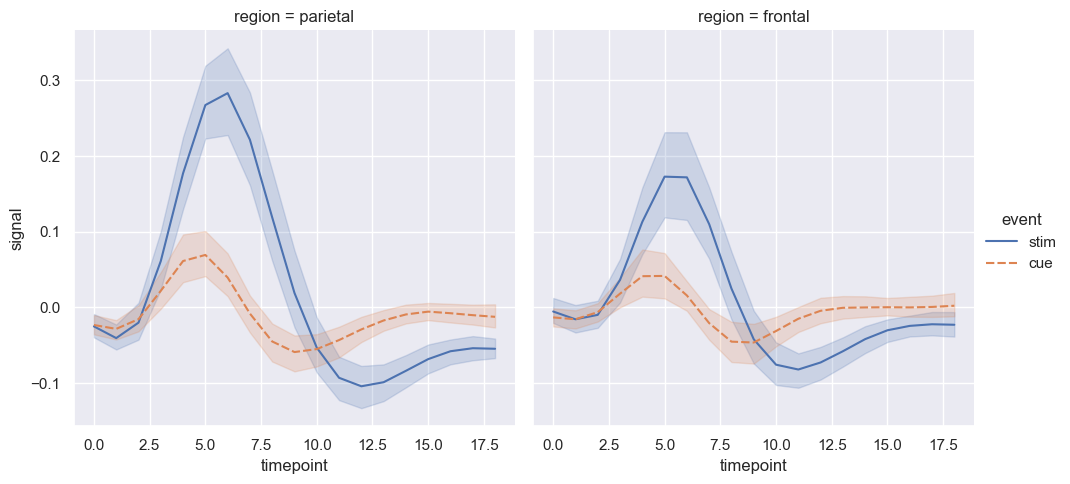

In [25]:
fmri = sns.load_dataset("fmri")

sns.relplot(
    data=fmri, kind='line',
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
    )

plt.show()

Anche in questo caso abbiamo usato la funzione ___relplot()___, che nel primo esempio aveva disegnato uno scatterplot. In questo caso, aggiungendo un singolo parametro (_kind_ = 'line') abbiamo ottenuto un grafico totalmente diverso che mostra l'andamento di una variabile in funzione di un'altra.

Inoltre, l'_alone_ intorno alle due linee rappresenta l'intervallo di confidenza per ciascun punto, dandoci un'idea di quanto la misura sia affidabile e i dati dispersi.

Nello stesso modo possiamo produrre un grafico rappresentante uno scatterplot e una regressione lineare, utilizzando la funzione _lmplot()_:

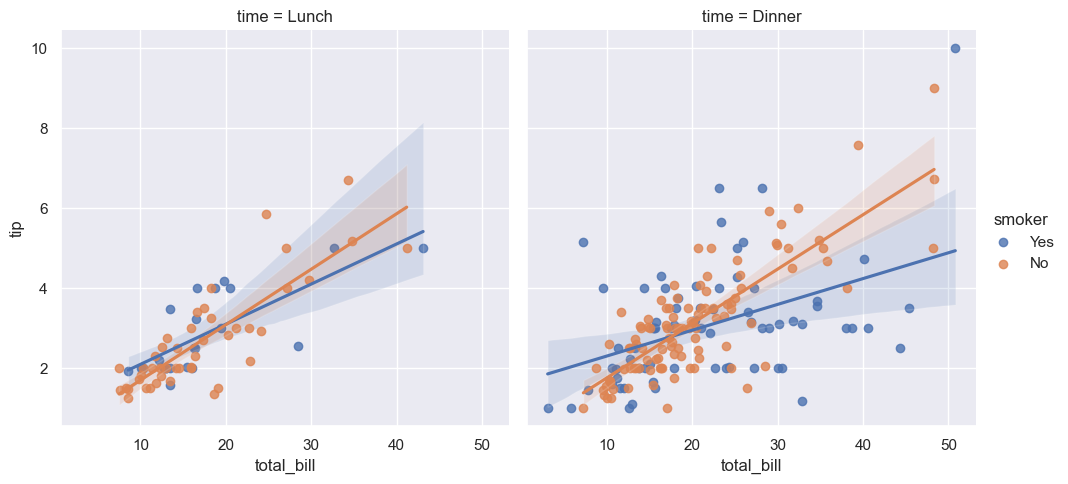

In [8]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
plt.show()

### Rappresentare Distribuzioni

Le analisi statistiche richiedono conoscenze sulla distribuzione delle variabili nel set di dati. La funzione _displot()_ supporta diversi approcci per visualizzare le distribuzioni. Questi includono tecniche classiche come gli istogrammi e approcci computazionalmente intensivi come la ___Kernel Density Estimate (KDE)___:

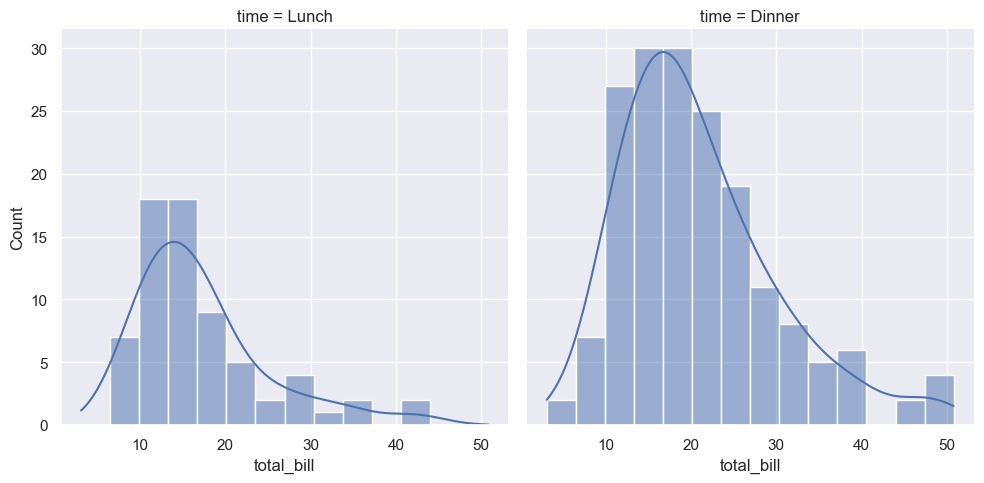

In [14]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)
plt.show()

### Rappresentazione di dati categorici

Diversi tipi di grafici in Seaborn sono orientati alla visualizzazione di dati categorici. È possibile accedervi tramite ___catplot()___.

Questi grafici offrono diversi livelli di granularità. Al livello più dettagliato, è possibile visualizzare ogni osservazione tracciando un grafico “swarm”: un grafico a dispersione che regola le posizioni dei punti lungo l'asse categorica in modo che non si sovrappongano:

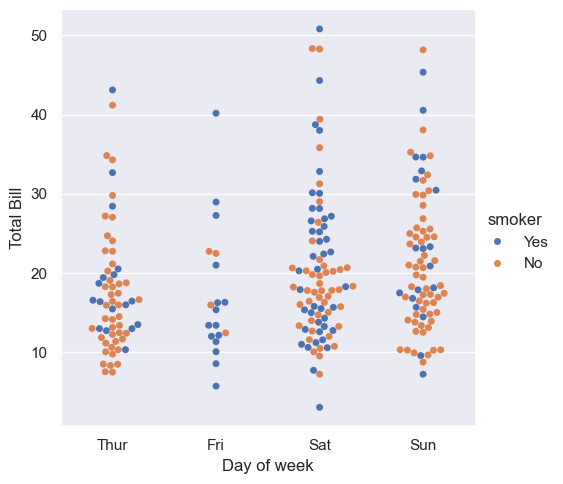

In [18]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")
plt.xlabel("Day of week")
plt.ylabel("Total Bill")
plt.show()

Cambiando esclusivamente il parametro _kind_, possiamo ottenere un grafico completamente diverso, come un _Violin plot_ o grafico a "violino":

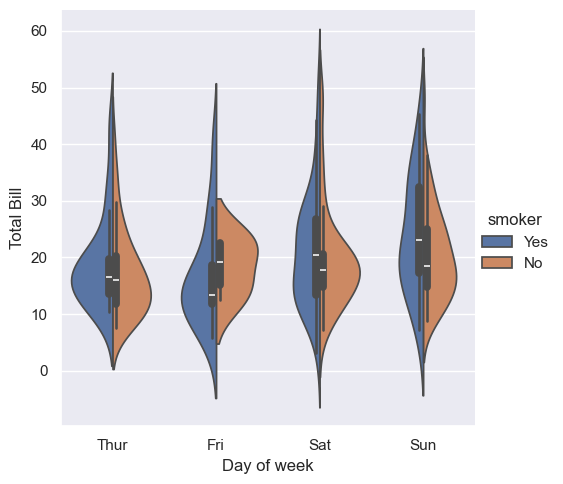

In [21]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)
plt.xlabel("Day of week")
plt.ylabel("Total Bill")
plt.show()

Oppure potremmo scegliere di mostrare solo i valori medi, con il relativo intervallo di confidenza, utilizzando un grafico a barre:

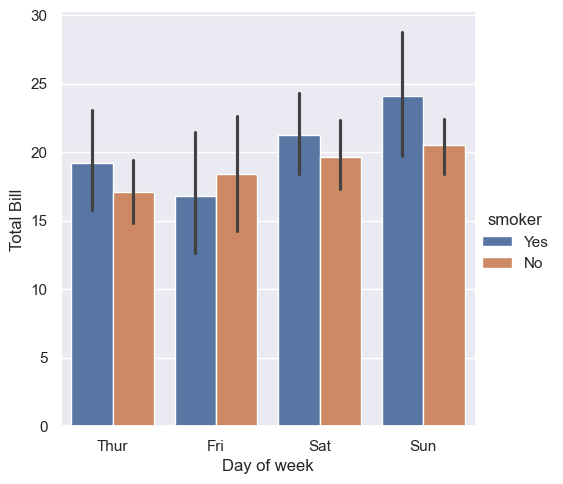

In [22]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")
plt.xlabel("Day of week")
plt.ylabel("Total Bill")
plt.show()

### Analisi multivariata

Seaborn offre delle funzionalità per generare grafici estremamente complessi con una sola riga di codice. Ad esempio funzioni come _joinplot()_ e _pairplot()_ ci permettono di osservare in modo rapido ed efficace come si comportano diverse variabili in relazione alle altre. Vediamo due esempi per visualizzare la potenza di queste due funzioni. Per farlo utilizzeremo un nuovo dataset, _penguins_, anche questo fornito da Seaborn, che contiene alcuni dati su diverse specie di pinguino:

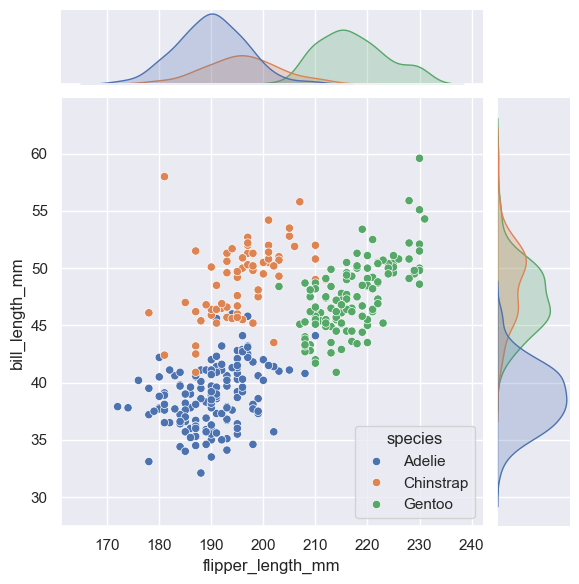

In [23]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()

Di nuovo, alcune considerazioni: con una singola riga di codice abbiamo generato un grafico che mostra la relazione tra due variabili (lunghezza del becco e lunghezza delle "pinne") divise per le 3 categorie disponibili per la variabile "specie".

Abbiamo uno scatterplot, che ci fa capire se queste due variabili varino in modo consistente attraverso le diverse speciee allo stesso tempo una distribuzione che ci da' un'idea più chiara di come queste caratteristiche siano separate o si sovrappongano.

Per quanto riguarda invece la funzione _pairplot()_:

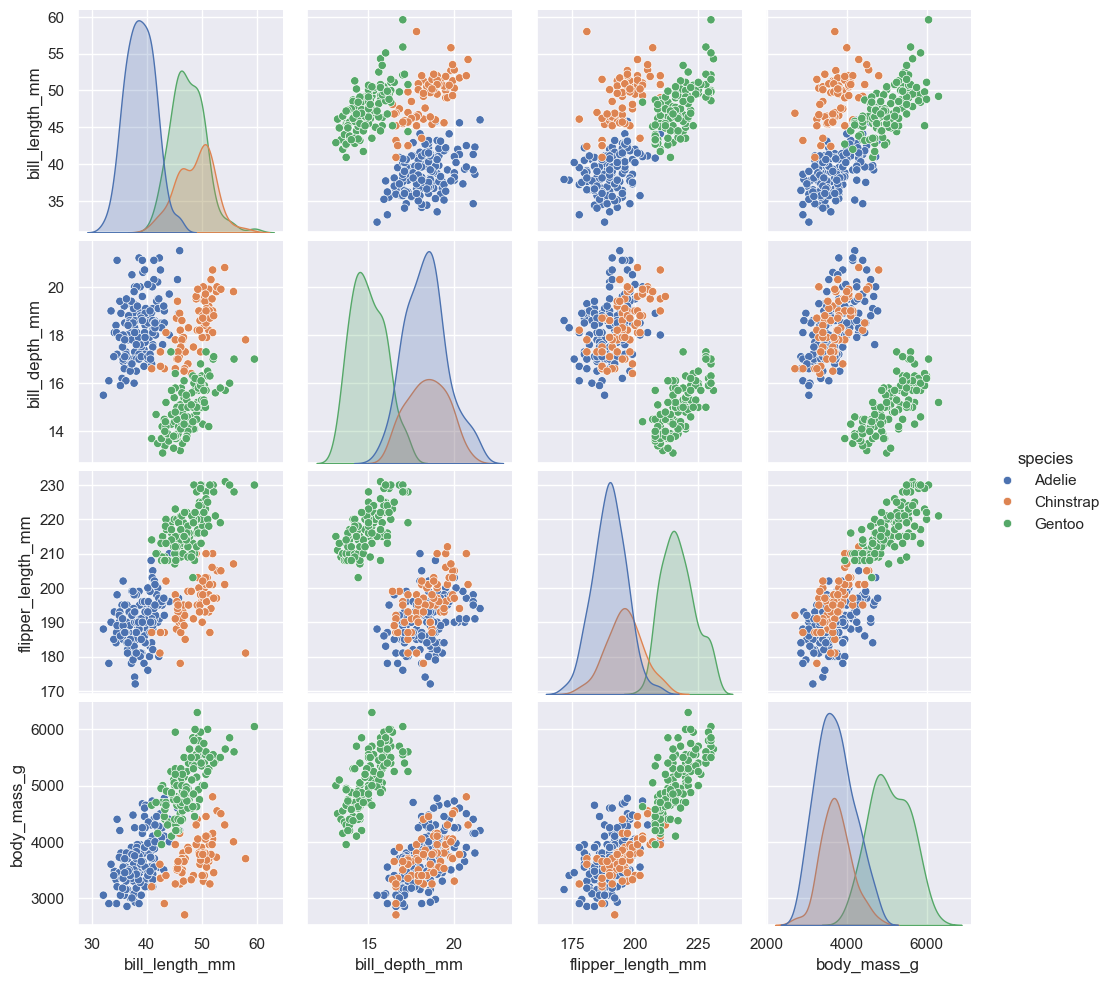

In [24]:
sns.pairplot(data=penguins, hue="species")
plt.show()

Semplicemente passando a Seaborn il Dataset e dicendogli per quale variabile categorica separare i dati, abbiamo una visualizzazione chiara di come si distribuiscono tutte le variabili continue (la diagonale) e dei rapporti per ciascuna coppia di variabile.